# PA6 - Random Projection Distortions and KNN Classifier

## Random Projections and their Distortion

#### Euclidean distance of two vectors
The distance of two vectors, x and y, each of which are of dimension d is given by the following formula:

$$E_d(A,B) = \sqrt{\sum_i^d (a_i - b_i)^2}$$

This formula can be easily computed in Python np.linalg.norm function described below.

#### Useful Linear Algebra functions in Python:
1. array.shape() - returns a tuple containing the shape of "array"
2. array.T - returns the transpose of "array" (i.e if "array" is a P x Q matrix, the transpose would be a Q x P matrix where A[i,j] = A[j,i] for all $1 \leq i \leq P$ and for all $1 \leq j \leq Q$)
3. np.linalg.norm(array) - computes the l2 norm of "array" by default. Documentation can be found <a href = "https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html" title="here"> here </a>


### Problem Statement

In the first part of this assignment, you are given a data set in the form of a $n \times d$ matrix, where $n$ represents the number of data points, and $d$ represents the dimensions of each data point.

You are tasked with reducing the dimensionality of the data set using the Johnson-Lindenstrauss Lemma and to measure the average distortion accross different projection dimensions.

### Dimension Reduction

Suppose we are given n points where each point, $x_i$ where $1 \leq i \leq n$ is a massive vector in the Euclidean space $\mathbb{R}^d$ (i.e. each point is a massive vector with d elements). We are interested in all-pairwise Euclidean distances. Being able to work with vectors in lower dimensions would mean less computation, and therefore overall faster execution. 

The question becomes: how do we reduce "d" while still maintaining a good approximation between all pairs of Euclidean distances? The answer was given by Johnson and Lidenstrauss in the form of the following lemme we saw in class.

#### Johnson Lidenstrauss lemma

Let $\epsilon \in (0, \frac{1}{2})$, Then for **any** set of points $S = \{x_1, ..., x_n\}$ in $\mathbb{R}^d$, there exists a mapping, $A: \mathbb{R}^d \to \mathbb{R}^k$ where $k = O(\frac{log n}{\epsilon^2})$ s.t.

$$\forall x_1, x_2 \in S: (1-\epsilon)   \| x_1 - x_2 \|  \leq \|Ax_1 - Ax_2\| \leq (1+\epsilon)   \|x_1 - x_2 \| $$

Notice in the lemma above that $k$ does not actually depend on $d$, but only on $n$ and $\epsilon$

#### The transformation mapping, A

In class you saw that the entries of matrix $A$ are drawn from a Normal distribution $\mathcal{N}(0,1)$, and then this matrix is multiplied by $\frac{1}{\sqrt k}$. An alternative construction that is suprisingly simple due to Achlioptas is the following: the mapping, A, is a $k \times d$ matrix, where each entry in the matrix is randomly assigned as $-\frac{1}{\sqrt k}$ or $+\frac{1}{\sqrt k}$ with equal probability. The JL lemma still holds. 

### Distortion

In many practical scenarios, we want to try dimensions $k$ less than the value required by the JL lemma. We are no longer guaranteed that $\frac{\|Ax_1 - Ax_2\| }{\sqrt{k}}$ will be within a $(1\pm \epsilon)$ factor of the true distance between $x_1,x_2$.  We refer to the differences in distance between transformed points and their respective original points as **distortion**. Specifically, we have the following definition of the **distortion** caused by the embedding, A:

$$distortion_A(x,y) = | \frac{\|Ax - Ay\|}{\|x-y\|} - 1|$$

$$distortion(A) = \max_{x,y} \ distortion_A(x,y)$$

Here, $\mathcal{D}$ is our dataset.   The first formula describes the distortion between a given pair of points, cause by the projection A.  The second formula defines the distortion of the mapping, A over the whole set of points in $\mathcal{D}$, and is just the maximum distortion of any two points from  $\mathcal{D}$

### Quick question (2 points each, Double Click to Edit): 

#### 1. When is $distortion(A) = 0$?
When the l2 norm of Ax - Ay = 1
#### 2. Comment on the overal trend of the distortion as a function of target_dimension. Reference the graph you plotted below

In [13]:
#import cell
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics
import pandas as pd

def load(data_path):
    data = np.load(data_path)
    return data

data = load("./gastro_data.npy") #assumes file is in same directory as ipynb

(700, 5)
aaaaa
(700, 10)
aaaaa
(700, 20)
aaaaa
(700, 50)
aaaaa
[0.8891177457447365, 0.7843052566144615, 0.560781884793731, 0.3353461183791646]
[5, 10, 20, 50]


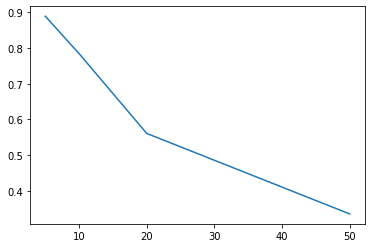

In [14]:
def create_mapping(original_data, target_dimension):
    '''
    Input:
        Original data: N x D np array
        params: dictionary contatining the two parameters "dtype" and "target_dimension"
    Output:
        D x K np array, where K = "target_dimension" from params and the elements follow
        the mapping, A, described in the problem
    '''
    d = np.shape(original_data)[1]
    k=target_dimension
    A = np.random.choice([-1,1], size=(d,k), p= [0.5,0.5])
    A = A * (1/np.sqrt(k))

    return A
    
def project(original_data, mapping):
    '''
    
    Apply the mapping to the N x D original_data, returning the N x K projection where K << D
    Input:
        Original data: R x D np array
        mapping: D x K np array from "create_mapping" function
        
    Output:
        N x K np array where each row is the random projection of the original D dimension vector. 
    '''
    # o = (n x d)
    # A (d x k)
    # x (1 x d)
    # AT = (k x d)
    # xT = (d x 1)
    # ATxT = (k x 1)

    resultmat = np.dot(mapping.T, original_data.T)
    k = np.shape(mapping)[1]
    n = np.shape(original_data)[0]
    d = np.shape(original_data)[1]

    # print(k)
    # print(n)
    # print(d)
    output = np.zeros([n,k])
    A = mapping.T
    
    print(np.shape(output))
    # print(np.shape((np.dot(A,original_data[:,160]))))
    for x in range(n):
        output[x,:] = (np.dot(A,original_data[x,:].T))
    return output



def all_distortions(original_data, new_data, random_sample = None):
    '''
    A helper function for "calculate_distortion"
    
    Calculate all pairwise distortions of an embedding and return as a List
    
    Input:
        original_data: N x D matrix representing the original data
        new_data: N x K matrix, where K << D, represending the data with random projection applied
        
    Output:
        List - containing all distortions values for all data points in any order. 

    '''

    distortions_list = []
    n = np.shape(original_data)[0]
    for i in range(n):
        for j in range(n):
            if i != j:
                og_dist = np.linalg.norm(original_data[i,:] - original_data[j,:])
                new_dist = np.linalg.norm(new_data[i,:] - new_data[j,:])
                if og_dist != 0:
                    distortion = np.abs((new_dist/og_dist)-1)
                    distortions_list.append(distortion)
    return distortions_list


def calculate_distortion(original_data, new_data, random_sample = None):
    '''
    calculate the distortion of an embedding.

    Input:
        original_data: N x D matrix representing the original data
        new_data: N x K matrix, where K << D, represending the data with random projection applied
        
    Output:
        Maximum distortion for the random projection that created "new data". 
        
    '''
    print('aaaaa')
    # print(all_distortions(original_data, new_data))
    return np.max(all_distortions(original_data, new_data))



def plot_distortion(original_data, list_of_target_dimensions=[5,10,20,50]):
    '''
    Plot the average distortion for the given list_of_target_dimensions
    
    Input:
        list_of_target_dimensions: list where each element represents a target dimensions to project the data onto
        original data: N x D matrix 
        
    Output:
        No return
        display a graph using matplotlib where the x-axis is the target dimensions,
        and Y is the average distortion accross 5 trials for that specific target dimension.
    '''
    distortions = []
    for x in list_of_target_dimensions:
        A = create_mapping(original_data, x)
        new_data = project(original_data, A)
        distortions.append(calculate_distortion(original_data, new_data))

    print(distortions)
    print(list_of_target_dimensions)
    plt.plot(list_of_target_dimensions, distortions)

np.shape(data)
plot_distortion(data)


## Effects of Random Projection on a K-Nearest Neighbor (KNN) Classifier

## Problem Statement

In the previous problem we looked at how using random projections can cause some distortion between the pair wise distances of any two points in the data set. In this problem we will be looking at a classification algorithm that uses pair wise distances to decide what class a point belongs to; the classification algorithm we will be analyzing is the KNN classifier. 

You will be able to observe, first hand, the effects that random projections has on both the performance (accuracy, recall, precision, f1 score) of the classifier, as well as the speed of the classifier. 

#### Data Set
You are given 4 files:
1. GENE_train_data.npy - n x d numpy array, which represents the training data for the classifier
2. GENE_train_data.npy - n x 1 numpy array, which represents the true labels of the trianing data
3. GENE_test_data.npy - m x d numpy array, which represents the testing data for the classifier
4. GENE_test_labels.npy - m x 1 numpy array, which represents the true labels of the testing data

n = 640, m = 160, and d = 16,383


## K-Nearest Neighbor Classifier

For a KNN, you are given a training and testing data set. As the names suggest, your training will be used to "train" your classifier, and testing will be used to assess the classifier.

For each data point in your testing set, you will iterate through the training set and return a class decision for the testing point. The class decision will be based on the majority classes of the K "nearest neighbors" to the testing point. "Nearest" is defined as the shorted Euclidean distance. 

For this problem you have the option of implementing your own KNN classifier, or you can use the built in KNN classifier in SKLearn. You can read more about SKLearn's KNN <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" title="here"> here </a>

For both your own implementation and the build in KNN, please set the num_neighbors = 5

## Metrics

Here are four common metrics used to assess a classification model:
1. Precision - <a href="https://en.wikipedia.org/wiki/Precision_and_recall" title='pr'> more information </a>
2. Recall - <a href="https://en.wikipedia.org/wiki/Precision_and_recall" title='pr'> more information </a>
3. F1 Score - <a href="https://en.wikipedia.org/wiki/F-score" title='pr'> more information </a>
4. Accuracy - formula is "guessed correct / total number of samples"

## Data Description

The data set we are working with is collected by analyzing the gene expression of patients diagnosed with different types of tumors. The types of tumors analyzed in this model are given by their shorthands: BRCA, KIRC, COAD, LUAD, PRAD. (Feel free to look up these short hands to learn more about what types of tumors this data set deals with). Over 16,000 gene expressions were analyzed for every patient.

For this problem, we use a KNN + training data to classify newly diagnosed patients into one of these categories. In order to make application of KNN easier,I have replaced the class name labels with class ID labels using the following scheme. {'BRCA': 0, 'COAD': 1, 'KIRC': 2, 'LUAD': 3, 'PRAD': 4}

When answering the written questions at the end of the homework, you should take into consideration the data your classifier operates on. 

## Code Base

You are given the following:
1. load - A function that loads all data and labels into memory
2. metrics - A function that computes metrics given a prediction array and truth array
    
You are asked to complete the following:
1. originalDataKNN(train, train_labels, test, test_labels)
2. randomProjectionKNN(train, train_labels, test, test_labels)
3. Three written questions to be answered at the end
    

In [15]:
from sklearn.neighbors import KNeighborsClassifier
import time
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt
import warnings
#warnings.filterwarnings("ignore")  <- supresses python warnings. feel free to leave commented or uncomment
labels = [0,1,2,3,4] #global var used for metrics function

def load(train_data_path, train_labels_path, test_data_path, test_labels_path):
    '''
    Input:
        train_data_path - path to given .npy file
        train_labels_path - path to given .npy file
        test_data_path - path to given .npy file
        test_labels_path - path to given .npy file
        
    Output:
        train - np array
        train_labels - np array
        test - np array
        test_labels - np array
    '''
    train = np.load(train_data_path)
    train_labels = np.load(train_labels_path)
    test = np.load(test_data_path)
    test_labels = np.load(test_labels_path)
    
    return train, train_labels, test, test_labels

def metrics(truth, prediction):
    '''
    Input:
        truth: Numpy array w/ dimensions M x 1 Where each element is the true class of the respective point in "test"
        prediction: Numpy array w/ dimensions M x 1 where each element is the predicted class of the respective point in "test"
    Output:
        accuracy, precision, recall, and f1 score of prediction vs truth
    '''
    accuracy = sklearn.metrics.accuracy_score(truth, prediction) 
    prec = sklearn.metrics.precision_score(truth, prediction, labels=labels, average='micro')
    recall = sklearn.metrics.recall_score(truth, prediction, labels=labels, average='micro')
    f1 = 2*(prec *recall) / (prec + recall)
    return accuracy, prec, recall, f1

def create_mapping(original_data, target_dimension):
    '''
    copy your code from the first problem here for convenience 
    
    Input:
        Original data: N x D np array
        params: dictionary contatining the two parameters "dtype" and "target_dimension"
        
    Output:
        D x K np array, where K = "target_dimension" from params and the elements follow the mapping, A, described in the problem
    '''
    d = np.shape(original_data)[1]
    k=target_dimension
    A = np.random.choice([-1,1], size=(d,k), p= [0.5,0.5])
    A = A * (1/np.sqrt(k))

    return A

def project(original_data, mapping):
    '''
    copy your code from the first problem here for convenience 
    
    Input:
        Original data: R x D np array
        mapping: D x K np array from "create_mapping" function
        
    Output:
        N x K np array where each row is the random projection of the original D dimension vector. 
    '''
    k = np.shape(mapping)[1]
    n = np.shape(original_data)[0]
    d = np.shape(original_data)[1]

    # print(k)
    # print(n)
    # print(d)
    output = np.zeros([n,k])
    A = mapping.T
    
    # print(np.shape((np.dot(A,original_data[:,160]))))
    for x in range(n):
        output[x,:] = (np.dot(A,original_data[x,:].T))
    return output


#assumes all files are within the same directory as ipynb. If not, change the directory setup or adjust str paths below
train, train_labels, test, test_labels = load(train_data_path = "./GENE_train_data.npy", train_labels_path = "./GENE_train_labels.npy", test_data_path = "./GENE_test_data.npy", test_labels_path = "./GENE_test_labels.npy")


In [16]:
#Cell for KNN implementation
'''
Implement your KNN in this cell
'''
import time
from numpy import argsort

num_neighbors = 5

def kNN(train, train_labels, test, test_labels, k):
    pred_labels = []
    # print(np.shape(train))
    # print(np.shape(train_labels))
    for x_test in test:
        distances = []
        for x_train in train:
            # print(np.linalg.norm(x_test-x_train))


            distances.append(np.linalg.norm(abs(x_test-x_train)))
        
        indices = (np.asarray(distances)).argsort()
        # print(np.sort(distances)[0:k])
        # print([distances[x] for x in indices][0:k])
        nns = indices[0:k]
        nn_labels = [train_labels[x] for x in nns]
        nn_label = max(set(nn_labels), key = nn_labels.count)
        pred_labels.append(nn_label)
    # print(pred_labels)
    # print(test_labels)
    return(metrics(test_labels, pred_labels))

"""
def kNN_sk(train, train_labels, test, test_labels, k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train, train_labels)
    pred_labels = (neigh.predict(test))
    print(metrics(test_labels, pred_labels))

kNN_sk(train, train_labels, test, test_labels, 5)
"""



'\ndef kNN_sk(train, train_labels, test, test_labels, k):\n    neigh = KNeighborsClassifier(n_neighbors=k)\n    neigh.fit(train, train_labels)\n    pred_labels = (neigh.predict(test))\n    print(metrics(test_labels, pred_labels))\n\nkNN_sk(train, train_labels, test, test_labels, 5)\n'

In [17]:
def originalDataKNN(train, train_labels, test, test_labels):
    '''
    Input:
        train: N x D matrix representing original training data
        train_labels: N - length np vector, representing labels for training data
        test: M x D matrix, representing original testing data
        test_labels: M - length np vector representing labels for testing data
    
    Output:
        None
        
    In this cell, we ask you to run a KNN classifier on the original data set. 
    
    num_neighbors = 5

    For full credit make sure the following is computed and printed:
        1. The run time of the KNN
            a. we define run time as: before KNN classifier is created to after the metrics are computed
        2. The metrics of the classifier on the test data set. 
            a. metrics should be clearly printed and labled as to which number corresponds with which metric
    '''
    startTime = time.time()
    num_neighbors = 5

    metrics = kNN(train, train_labels, test, test_labels, num_neighbors)

    time_e = time.time()-startTime
    print('Time:', time_e)
    print('Metrics:' , metrics)
originalDataKNN(train, train_labels, test, test_labels)

Time: 4.582740783691406
Metrics: (1.0, 1.0, 1.0, 1.0)


In [18]:
def originalDataKNN(train, train_labels, test, test_labels):
    '''
    Input:
        train: N x D matrix representing original training data
        train_labels: N - length np vector, representing labels for training data
        test: M x D matrix, representing original testing data
        test_labels: M - length np vector representing labels for testing data
    
    Output:
        None
        
    In this cell, we ask you to run a KNN classifier on the original data set. 
    
    num_neighbors = 5

    For full credit make sure the following is computed and printed:
        1. The run time of the KNN
            a. we define run time as: before KNN classifier is created to after the metrics are computed
        2. The metrics of the classifier on the test data set. 
            a. metrics should be clearly printed and labled as to which number corresponds with which metric
    '''
    startTime = time.time()
    num_neighbors = 1

    metrics = kNN(train, train_labels, test, test_labels, num_neighbors)

    time_e = time.time()-startTime
    print('Time:', time_e)
    print('Metrics:' , metrics)
originalDataKNN(train, train_labels, test, test_labels)

Time: 4.577754735946655
Metrics: (1.0, 1.0, 1.0, 1.0)


Dimension: 25
Times: [0.6724098682403564]
Accuracies: [0.9650000000000001]
Dimension: 50
Times: [0.6724098682403564, 0.8858296394348144]
Accuracies: [0.9650000000000001, 0.9800000000000001]
Dimension: 100
Times: [0.6724098682403564, 0.8858296394348144, 1.1363590717315675]
Accuracies: [0.9650000000000001, 0.9800000000000001, 0.9925]
Dimension: 200
Times: [0.6724098682403564, 0.8858296394348144, 1.1363590717315675, 1.915668821334839]
Accuracies: [0.9650000000000001, 0.9800000000000001, 0.9925, 0.9949999999999999]


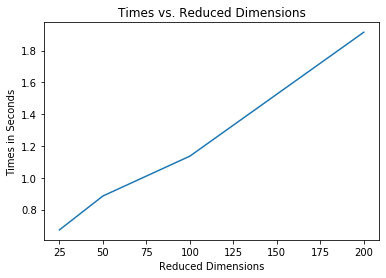

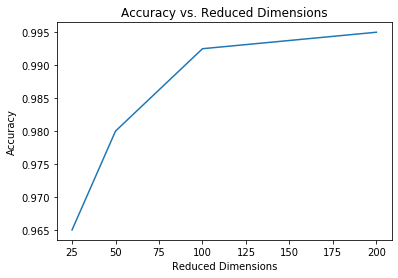

In [19]:
def randomProjectionKNN(train, train_labels, test, test_labels):
    '''
    Input:
        train: N x D matrix representing original training data
        train_labels: N - length np vector, representing labels for training data
        test: M x D matrix, representing original testing data
        test_labels: M - length np vector representing labels for testing data
    
    Output:
        None
        
    In this cell, we ask you to run a KNN classifier on the reduced data set via random projections. 

    For each dimensions, repeat the random projection + classification 5 times.
    
    num_neighbors = 5

    Please assess the classifier accross the following reduced dimensions: [25,50,100,200]

    For full credit make sure the following is computed and printed:
        1. For each reduced dimension listed above, clearly print and label the average run time and all average metrics
        2. 2 graphs need to be displayed using matplotlib.plt
            a. Graph 1: x-axis: Reduced dimension, y-axis: average run time accross 5 trials
            b. Graph 2: x-axis: reduced dimension, y-axis: average accuracy accross 5 trials
            c. Graphs should contain an approriate title, and axis labels
            
    Note: when measuring time for the classifier on the projected data, you should also include the time it took to
    project the data to the lower dimensionality as part of the overall run time.
    '''

    reduced_dimensions = [25,50,100,200]
    num_neighbors = 5
    num_trials = 5 
    avg_times = []
    avg_accs = []
    for dim in reduced_dimensions:
        times = []
        accuracies = []
        print('Dimension:', dim)
        for trial in range(num_trials):
            start_time = time.time()
            A_train = create_mapping(train, dim)
            # A_test = create_mapping(test, dim)
            
            train_reduced = project(train, A_train)
            test_reduced = project(test, A_train)

            results =  kNN(train_reduced, train_labels, test_reduced, test_labels, num_neighbors)
            accuracies.append(results[0])
            times.append(time.time()-start_time)
        avg_times.append(np.mean(np.asarray(times)))
        avg_accs.append(np.mean(np.asarray(accuracies)))

        print('Times:',avg_times)
        print('Accuracies:',avg_accs)
        
    plt.figure()
    plt.plot(reduced_dimensions, avg_times)
    plt.title("Times vs. Reduced Dimensions")
    plt.xlabel("Reduced Dimensions")
    plt.ylabel("Times in Seconds")
    plt.figure()
    plt.plot(reduced_dimensions, avg_accs)
    plt.title("Accuracy vs. Reduced Dimensions")
    plt.xlabel("Reduced Dimensions")
    plt.ylabel("Accuracy")


randomProjectionKNN(train, train_labels, test, test_labels)
    


### Analysis (Double Click to Edit)

1. What effect did the random projection dimensionality reduction have on the run time of the classifier?
2. What effect did the random projection dimensionality reduction have on the performance of the classifier?
3. Do you think the extra work needed to project the data to a lower dimensionality was worth it? In your answer, discuss the speed and performance of the classifier, as well as the space needed to store the data. In addition, provide evidence to back your claim. (Note: full score given as long as answer has sufficient evidence behind it). 

For each answer, refer to your graphs as evidence

In [20]:
print('1. The random projection dimensionality reduction caused the runtime of the classifier to increase as the value of k (number of dimensions) increased. That being said, at the highest k value, k=200, the runtime was still less than the runtime of the original kNN classifier with no dimensionality reduction')
print('2. The random projection dimensionality reduction decreased the accuracy slightly relative to the original. As k increased, the accuracy of the model increase as well, with diminishing gains after about k=50')
print('3. The extra work to project the data to a lower dimensionality was worthwhile because when k=200, meaning 1/80th of the original dimensionality, the average performance of the model is still above 99% accuracy, and the average runtime is half the original')

1. The random projection dimensionality reduction caused the runtime of the classifier to increase as the value of k (number of dimensions) increased. That being said, at the highest k value, k=200, the runtime was still less than the runtime of the original kNN classifier with no dimensionality reduction
2. The random projection dimensionality reduction decreased the accuracy slightly relative to the original. As k increased, the accuracy of the model increase as well, with diminishing gains after about k=50
3. The extra work to project the data to a lower dimensionality was worthwhile because when k=200, meaning 1/80th of the original dimensionality, the average performance of the model is still above 99% accuracy, and the average runtime is half the original
